# Zomato Restaurant

# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

# Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

### The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

* Restaurant Id: Unique id of every restaurant across various cities of the world
* Restaurant Name: Name of the restaurant
* Country Code: Country in which restaurant is located
* City: City in which restaurant is located
* Address: Address of the restaurant
* Locality: Location in the city
* Locality Verbose: Detailed description of the locality
* Longitude: Longitude coordinate of the restaurant&#39;s location
* Latitude: Latitude coordinate of the restaurant&#39;s location
* Cuisines: Cuisines offered by the restaurant
* Average Cost for two: Cost for two people in different currencies ��
* Currency: Currency of the country
* Has Table booking: yes/no
* Has Online delivery: yes/ no
* Is delivering: yes/ no
* Switch to order menu: yes/no
* Price range: range of price of food
* Aggregate Rating: Average rating out of 5
* Rating color: depending upon the average rating color
* Rating text: text on the basis of rating of rating
* Votes: Number of ratings casted by people

### Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas methods to combine all the datasets and then start working on this project.

## Dataset Link- https://github.com/dsrscientist/dataset4/blob/main/zomato.csv 


# Import important libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [27]:
df = pd.read_csv(r'C:\Users\rahul.tiwari2019\Downloads\zomato.csv', encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [30]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 9551
No of Columns: 21


In [32]:
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

# Analysis of Statistcal Views

Before Going for Statistical exploration of data, first check integrity of data & Missing value

In [40]:
df.duplicated().sum()

0

In [43]:
df.isin([' ?']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [46]:
df.isin([' ','NA','-']).sum().any()

False

There are no any missing values

# Checking Missing Values

<Axes: >

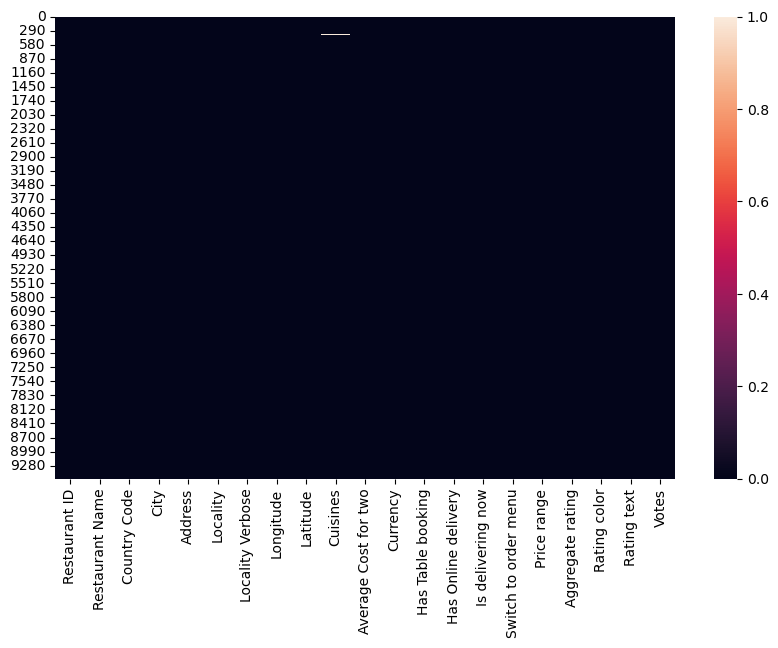

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [56]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                      Missing Values  % Missing data
Cuisines                           9        0.094231
Restaurant ID                      0        0.000000
Currency                           0        0.000000
Rating text                        0        0.000000
Rating color                       0        0.000000
Aggregate rating                   0        0.000000
Price range                        0        0.000000
Switch to order menu               0        0.000000
Is delivering now                  0        0.000000
Has Online delivery                0        0.000000
Has Table booking                  0        0.000000
Average Cost for two               0        0.000000
Restaurant Name                    0        0.000000
Latitude                           0        0.000000
Longitude                          0        0.000000
Locality Verbose                   0        0.000000
Locality                           0        0.000000
Address                            0        0.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

There are three type of data (Int64, object and Float64)

# Statistical Matrix

In [74]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: >

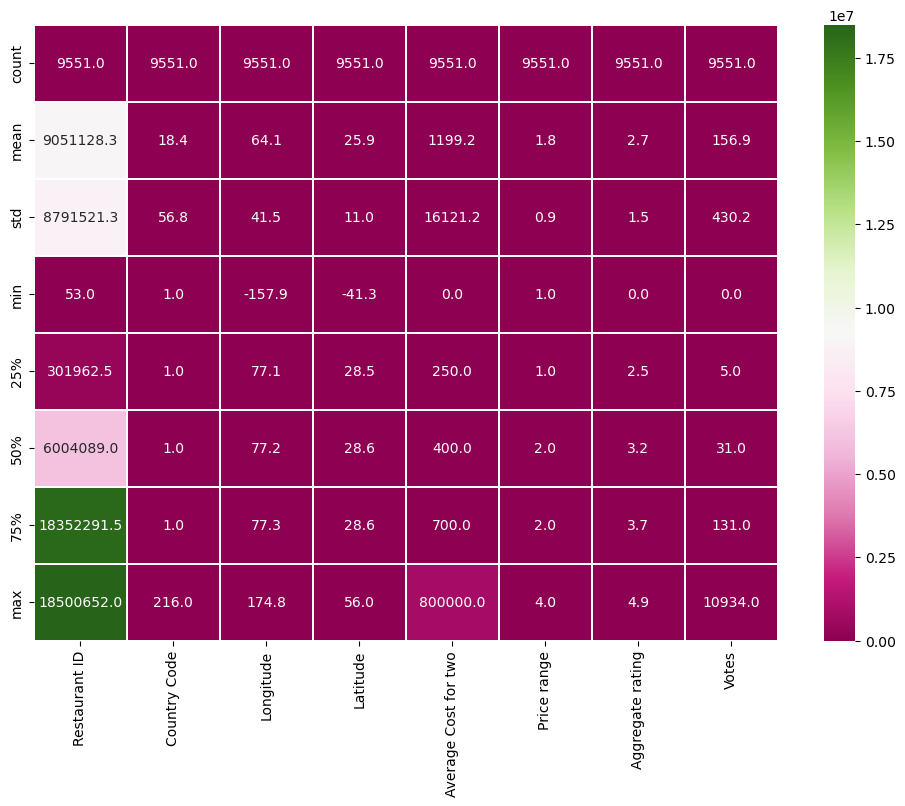

In [72]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

* The minimum and maximum votes of people in the dataset is 0 and 10934 votes respectively, while the average votes is 31.
* The minimum and maximum price range is 1 and 4 respectively, whereas the mean price level is 1.8.
* While the average rating is 2.666, minimum rating is 0 and maximum rating is 4.9. 

# Start Exploring categorial features with Enlisting Value counts & Sub-categories

In [86]:
# Separating numerical and categorical variable
Numerical=['Restaurant ID','Country Code','Longitude','Latitude','Average Cost for two','Price range','Aggregate rating','Votes']
Category=['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text']

In [89]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Restaurant Name
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64
City
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
Address
Address
Dilli Haat, INA, New Delhi                                                               11
Sector 41, Noida                                                                         11
Greater Kailash (GK) 1, New Delhi                              

# Exploratory Data Analysis

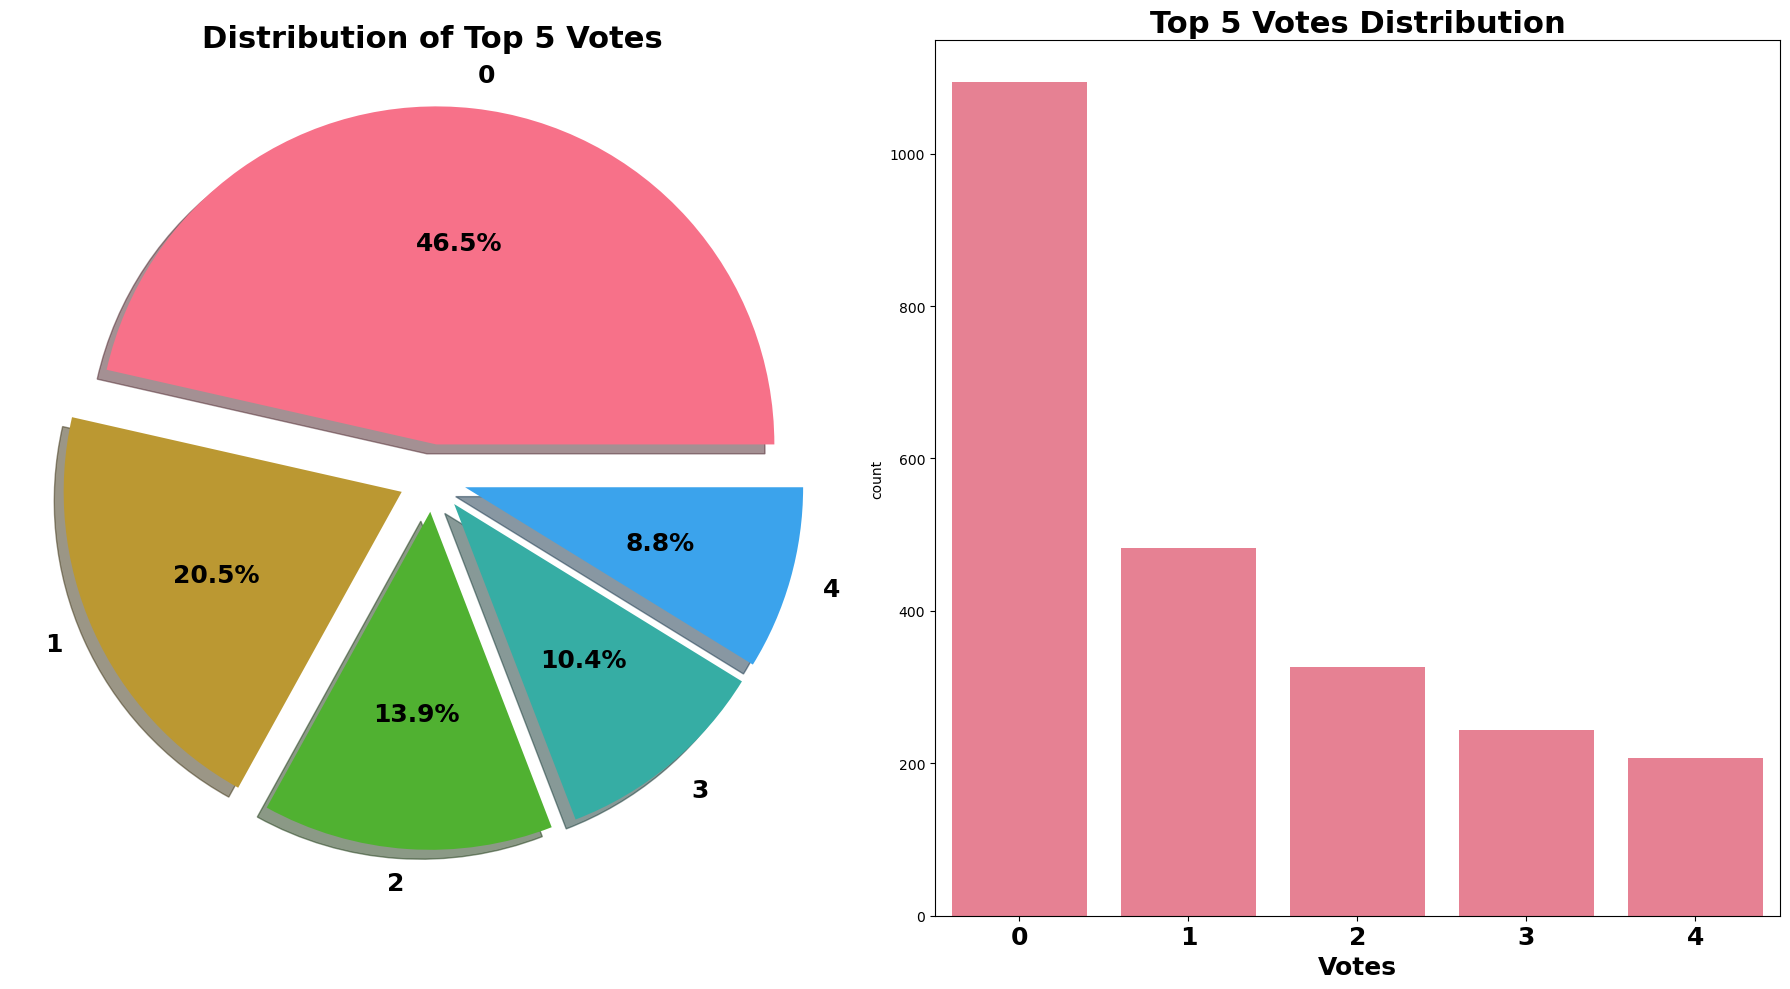

In [121]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 10))

votes_count = df['Votes'].value_counts().nlargest(5)

votes_count.plot.pie(
    explode=[0.1] * len(votes_count),  
    autopct='%3.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 18},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Distribution of Top 5 Votes', fontsize=22, fontweight='bold')
ax[0].set_ylabel('')  

sns.countplot(x='Votes', data=df, ax=ax[1], order=votes_count.index)
ax[1].set_title('Top 5 Votes Distribution', fontsize=22, fontweight='bold')
ax[1].set_xlabel("Votes", fontsize=18, fontweight='bold')

plt.xticks(fontsize=18, fontweight='bold')

plt.show()

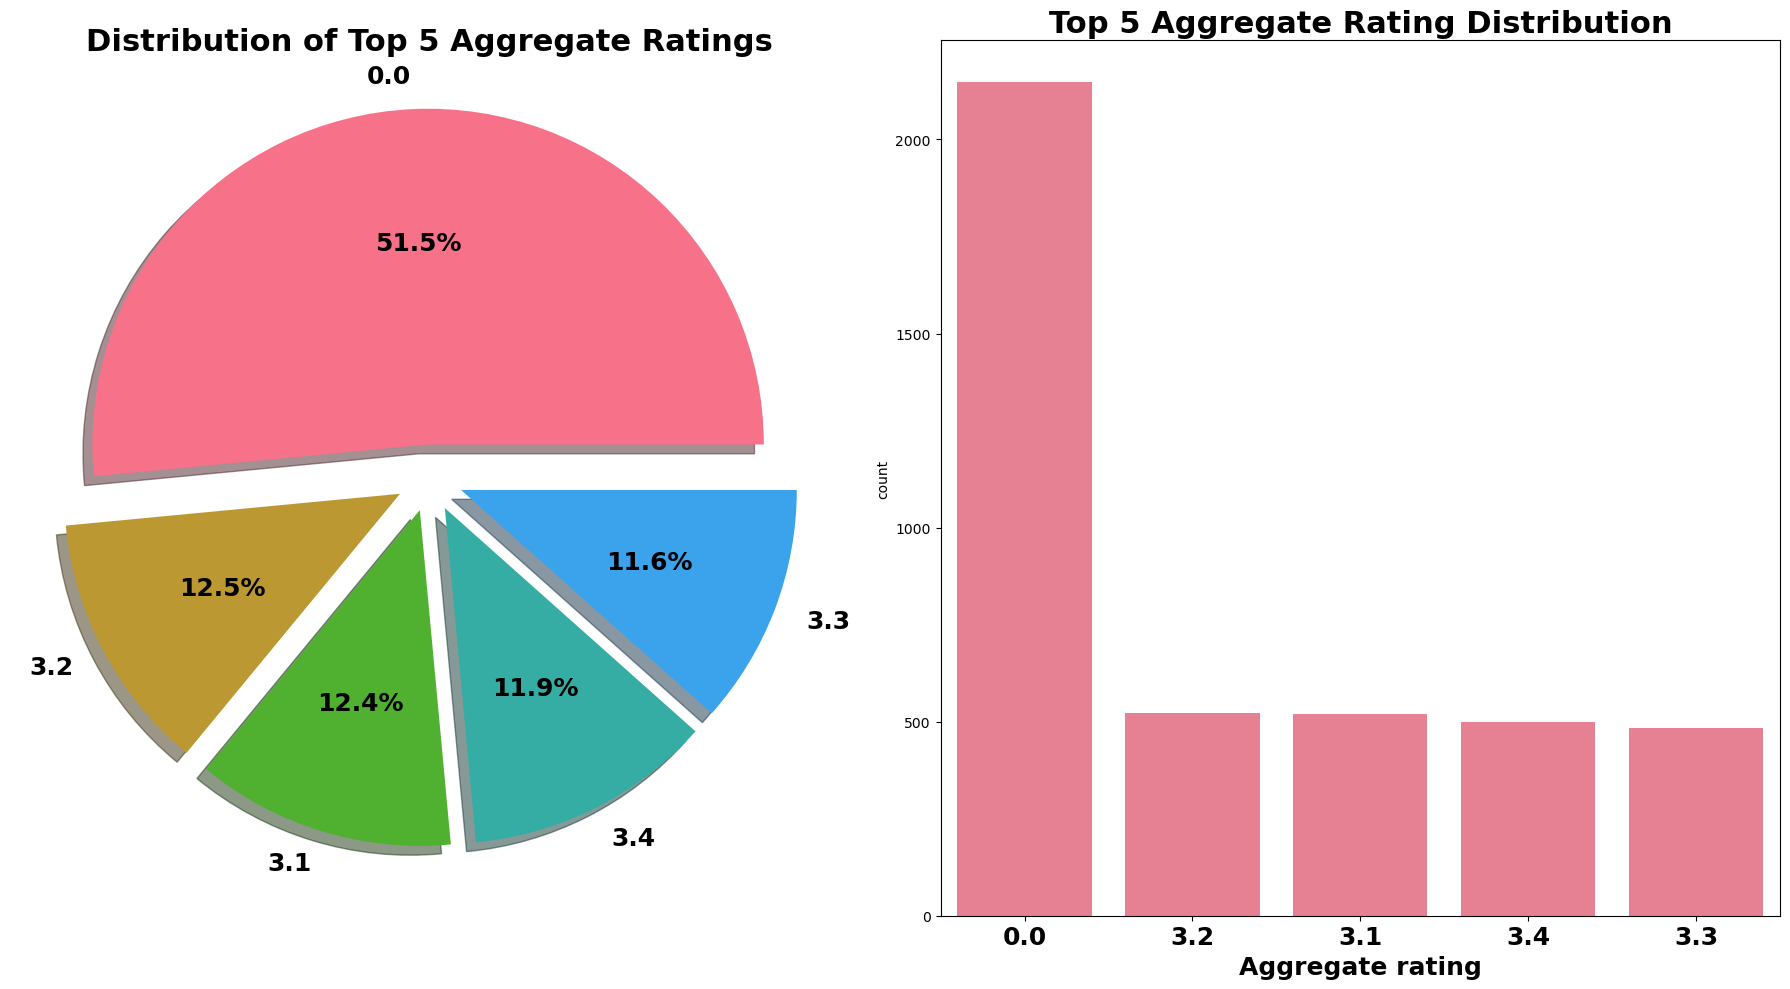

In [123]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 10))

aggregate_count = df['Aggregate rating'].value_counts().nlargest(5)

aggregate_count.plot.pie(
    explode=[0.1] * len(aggregate_count),  
    autopct='%3.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 18},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Distribution of Top 5 Aggregate Ratings', fontsize=22, fontweight='bold')
ax[0].set_ylabel('')  

sns.countplot(x='Aggregate rating', data=df, ax=ax[1], order=aggregate_count.index)
ax[1].set_title('Top 5 Aggregate Rating Distribution', fontsize=22, fontweight='bold')
ax[1].set_xlabel("Aggregate rating", fontsize=18, fontweight='bold')

plt.xticks(fontsize=18, fontweight='bold')

plt.show()

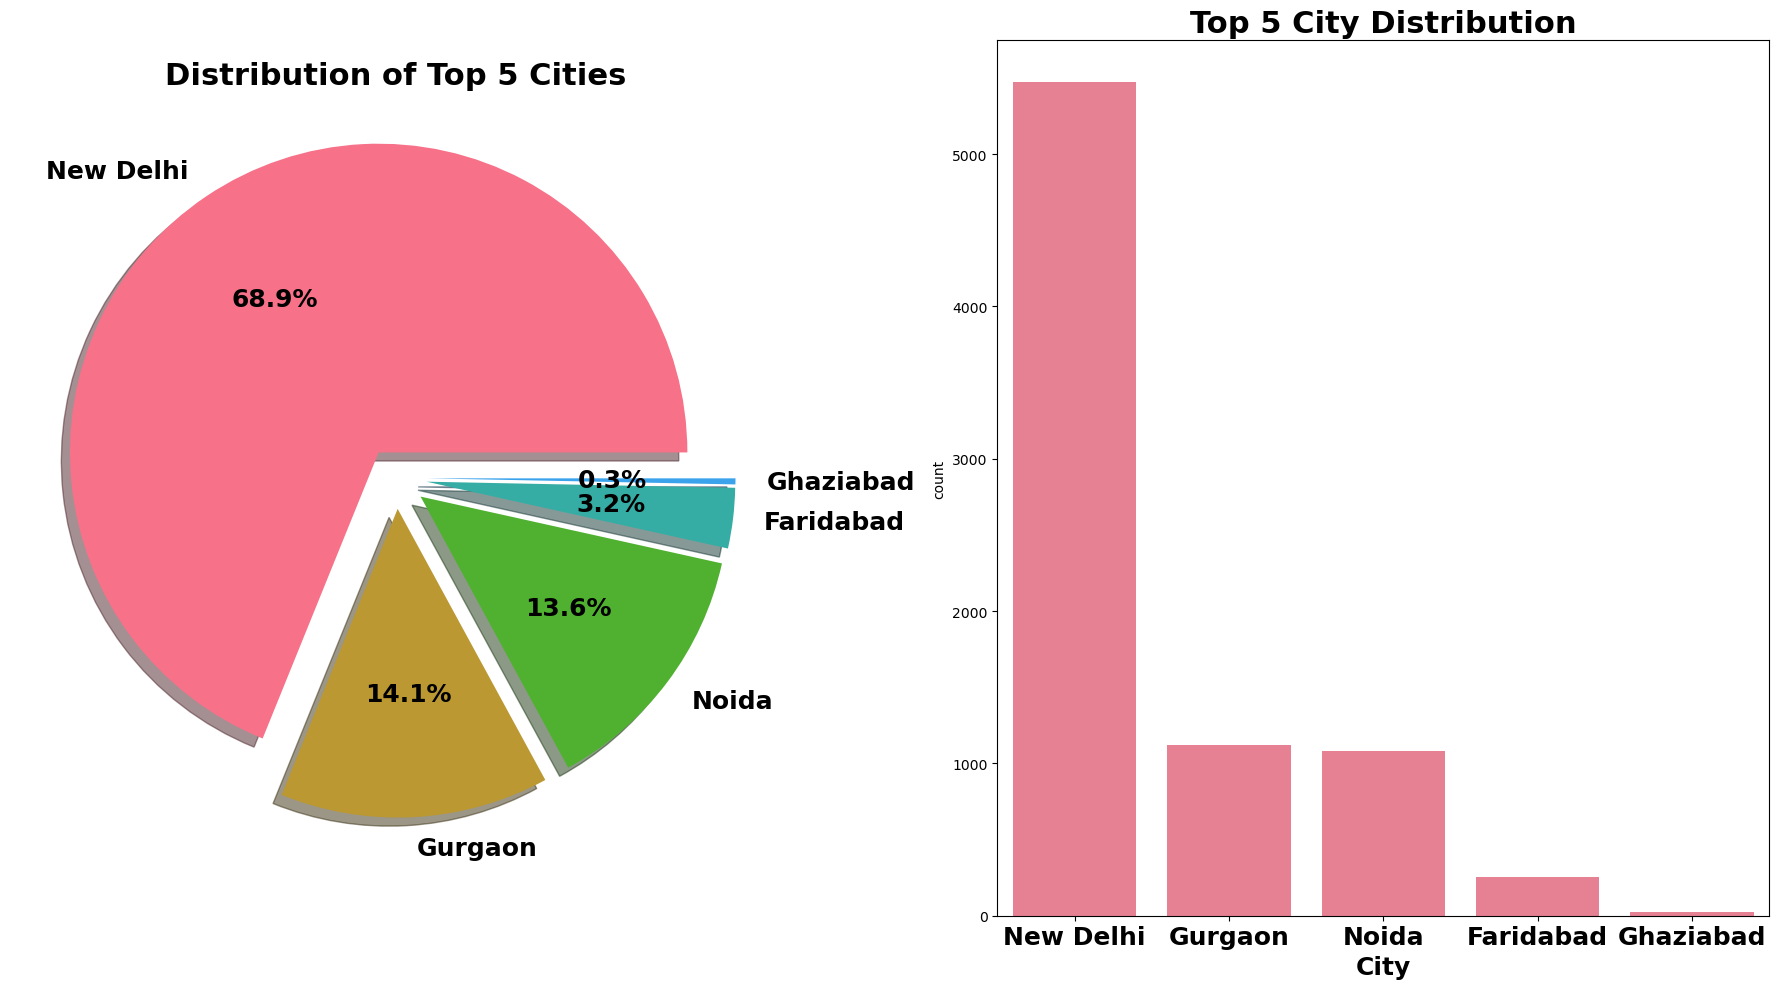

In [125]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 10))

city_count = df['City'].value_counts().nlargest(5)

city_count.plot.pie(
    explode=[0.1] * len(city_count),  
    autopct='%3.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 18},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Distribution of Top 5 Cities', fontsize=22, fontweight='bold')
ax[0].set_ylabel('')  

sns.countplot(x='City', data=df, ax=ax[1], order=city_count.index)
ax[1].set_title('Top 5 City Distribution', fontsize=22, fontweight='bold')
ax[1].set_xlabel("City", fontsize=18, fontweight='bold')

plt.xticks(fontsize=18, fontweight='bold')

plt.show()

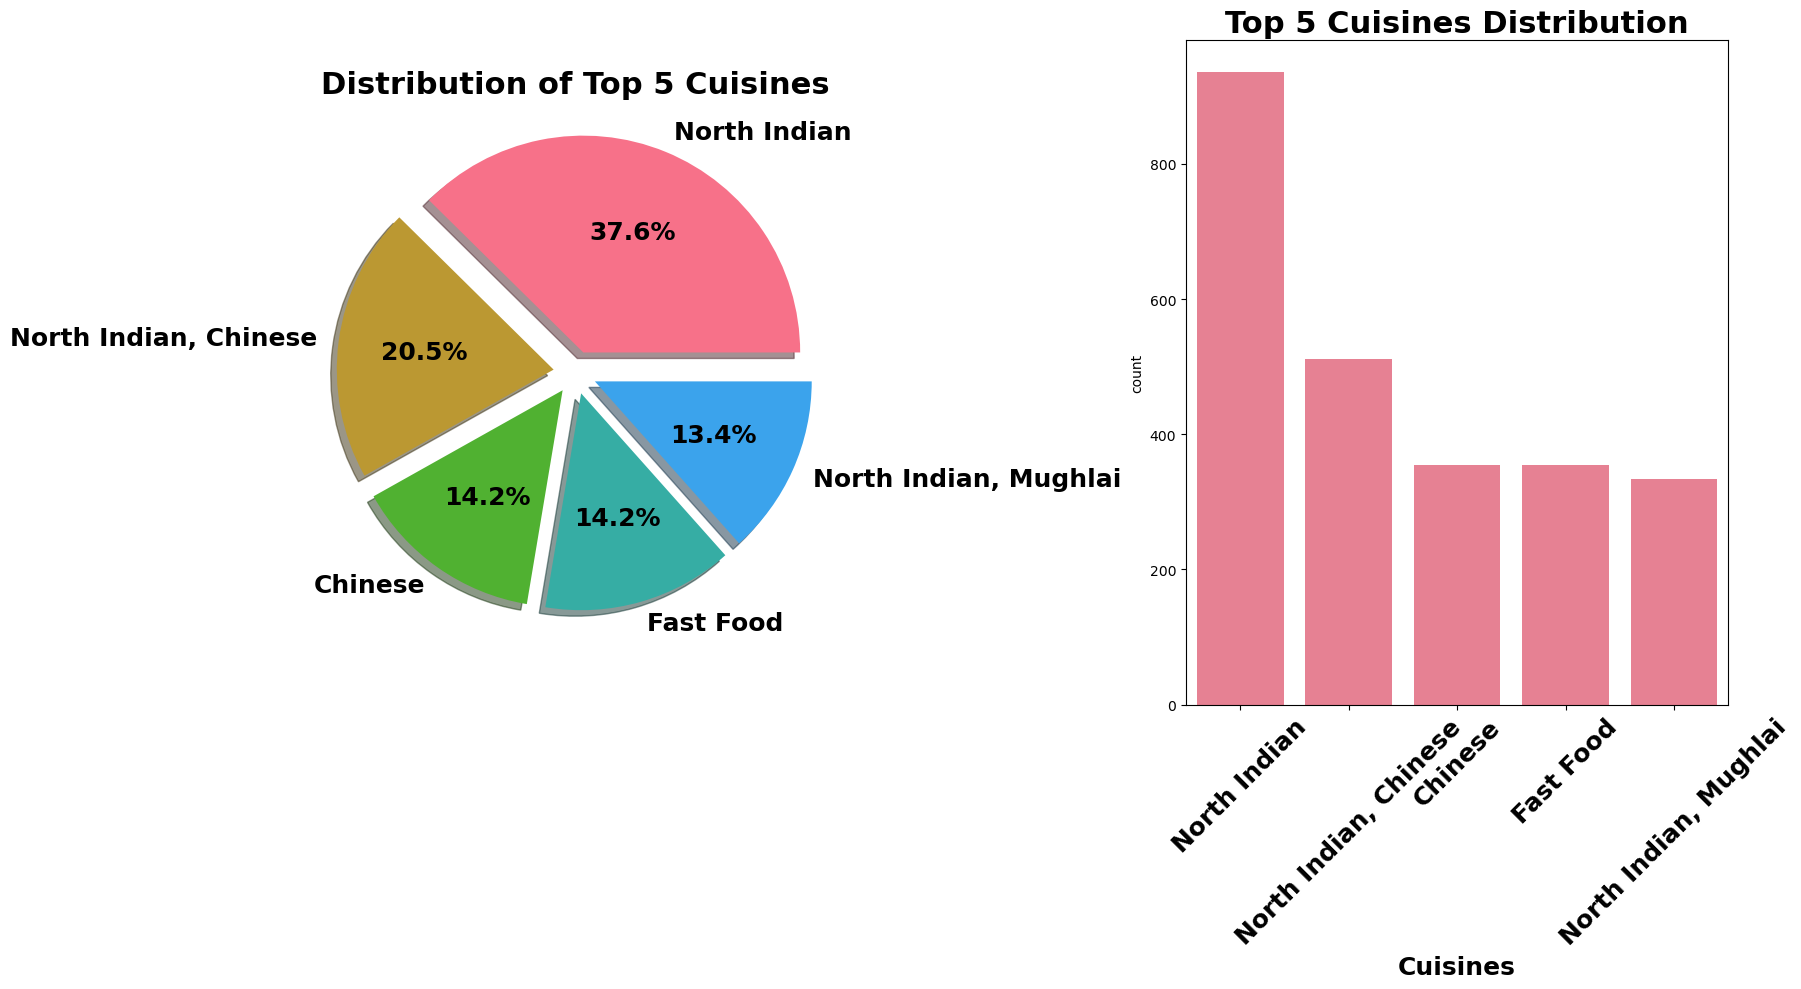

In [127]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(18, 10))

cuisine_count = df['Cuisines'].value_counts().nlargest(5)

cuisine_count.plot.pie(
    explode=[0.1] * len(cuisine_count),  
    autopct='%3.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 18},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Distribution of Top 5 Cuisines', fontsize=22, fontweight='bold')
ax[0].set_ylabel('')  

sns.countplot(x='Cuisines', data=df, ax=ax[1], order=cuisine_count.index)
ax[1].set_title('Top 5 Cuisines Distribution', fontsize=22, fontweight='bold')
ax[1].set_xlabel("Cuisines", fontsize=18, fontweight='bold')

plt.xticks(fontsize=18, fontweight='bold', rotation=45)  

plt.show()

* We can see most of pepole order north indian Cuisines

# NUMERICAL VARIABLE ANALYSIS

In [132]:
#GROUPING FEATURES AGGREATE RATING, RATING COLOR, RATING TEXT
df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [134]:
#Now converting the above group into dataframe:
df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()


,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [136]:
#Stroing this daatafrae:
rating = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()

In [139]:
rating

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [141]:
rating.rename(columns={0: 'rating count'},inplace=True)

In [143]:
rating

,Aggregate rating,Rating color,Rating text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='rating count'>

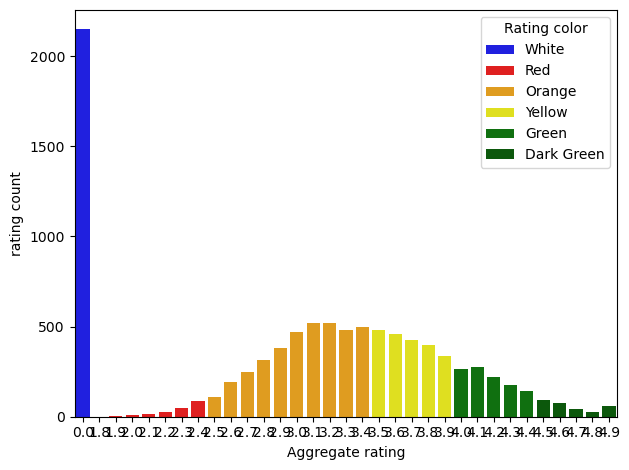

In [145]:
sns.barplot(x='Aggregate rating', y='rating count', data=rating, hue= 'Rating color', palette=['Blue','red','orange','yellow','green','darkgreen'])

<Axes: xlabel='Rating color', ylabel='count'>

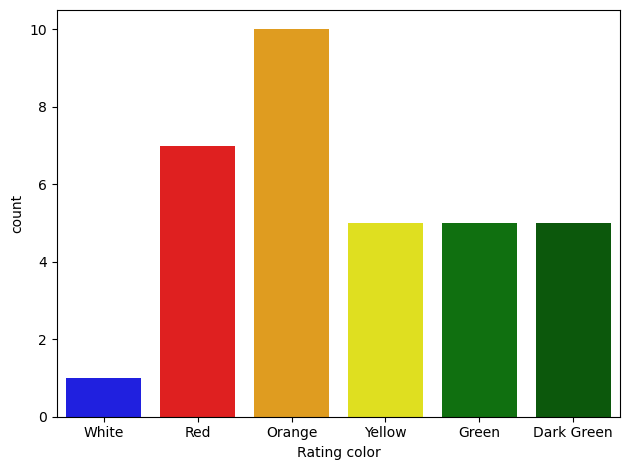

In [149]:
sns.countplot(x='Rating color',data = rating, palette=['Blue','red','orange','yellow','green','darkgreen'])

([<matplotlib.patches.Wedge at 0x1853ee4c980>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

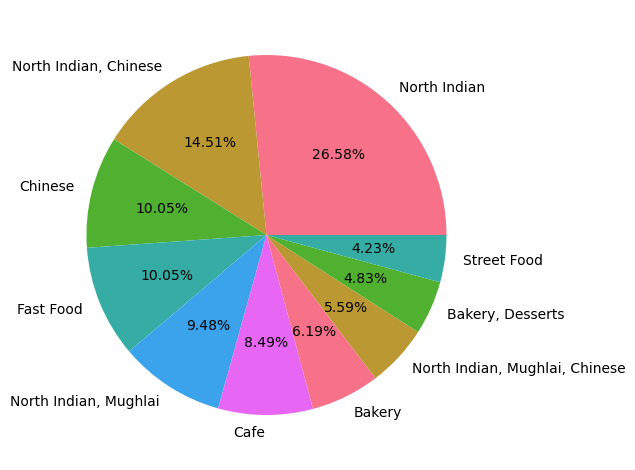

In [151]:
plt.pie(df['Cuisines'].value_counts().values[:10], labels=df['Cuisines'].value_counts().index[:10],autopct='%1.2f%%')

In [161]:
#Find out the countries which has given the best rating: Taking best rating = Excellent
df[df['Rating text'] == 'Excellent'].groupby('Cuisines').size().reset_index()

,Cuisines,0
0,African,1
1,American,3
2,"American, Asian, Burger",1
3,"American, Asian, European, Seafood",1
4,"American, Asian, Italian, Seafood",1
...,...,...
209,"Taiwanese, Street Food",1
210,Tapas,1
211,Thai,3
212,"Thai, European, Mexican, North Indian, Chinese...",1
